In [5]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Environment Index - Climate & Pollution

In [6]:
env = pd.read_csv('../Results/City_Environ_Index.csv')
env

,City Name,Climate Index,Pollution Index
0,"Chicago city, Illinois",69.04,38.87
1,"Boston city, Massachusetts",72.03,23.96
2,"New York city, New York",81.13,55.70
3,"Washington city, District of Columbia DC",83.11,38.22
4,"Atlanta city, Georgia",89.74,49.74
5,"Los Angeles city, California",95.90,61.93
6,"Austin city, Texas",82.65,33.61
7,"Raleigh city, North Carolina",83.66,20.50


In [7]:
score = [1,2,3,4,5,6,7,8]
env = env.sort_values('Climate Index')
env['Climate Score']=score
env

,City Name,Climate Index,Pollution Index,Climate Score
0,"Chicago city, Illinois",69.04,38.87,1
1,"Boston city, Massachusetts",72.03,23.96,2
2,"New York city, New York",81.13,55.70,3
6,"Austin city, Texas",82.65,33.61,4
3,"Washington city, District of Columbia DC",83.11,38.22,5
7,"Raleigh city, North Carolina",83.66,20.50,6
4,"Atlanta city, Georgia",89.74,49.74,7
5,"Los Angeles city, California",95.90,61.93,8


In [8]:
env = env.sort_values('Pollution Index')[::-1]
env['Pollution Score']=score
env

,City Name,Climate Index,Pollution Index,Climate Score,Pollution Score
5,"Los Angeles city, California",95.90,61.93,8,1
2,"New York city, New York",81.13,55.70,3,2
4,"Atlanta city, Georgia",89.74,49.74,7,3
0,"Chicago city, Illinois",69.04,38.87,1,4
3,"Washington city, District of Columbia DC",83.11,38.22,5,5
6,"Austin city, Texas",82.65,33.61,4,6
1,"Boston city, Massachusetts",72.03,23.96,2,7
7,"Raleigh city, North Carolina",83.66,20.50,6,8


In [9]:
env.to_csv("../Results/Final City Ranking for Environment.csv")

In [10]:
env_climate = env[['City Name','Climate Index','Climate Score']]
env_climate = env_climate.rename(columns={'Climate Index':'Index', 'Climate Score':'Score'})
env_climate = env_climate.sort_values(['Score'])[::-1]
env_climate['Type']='Climate'
env_pollution = env[['City Name','Pollution Index','Pollution Score']]
env_pollution = env_pollution.rename(columns={'Pollution Index':'Index', 'Pollution Score':'Score'})
env_pollution['Type']='Pollution'
env_all = env_climate.append(env_pollution)
env_all['Index']=env_all['Index'].astype(float)
env_all

,City Name,Index,Score,Type
5,"Los Angeles city, California",95.90,8,Climate
4,"Atlanta city, Georgia",89.74,7,Climate
7,"Raleigh city, North Carolina",83.66,6,Climate
3,"Washington city, District of Columbia DC",83.11,5,Climate
6,"Austin city, Texas",82.65,4,Climate
2,"New York city, New York",81.13,3,Climate
1,"Boston city, Massachusetts",72.03,2,Climate
0,"Chicago city, Illinois",69.04,1,Climate
5,"Los Angeles city, California",61.93,1,Pollution
2,"New York city, New York",55.70,2,Pollution


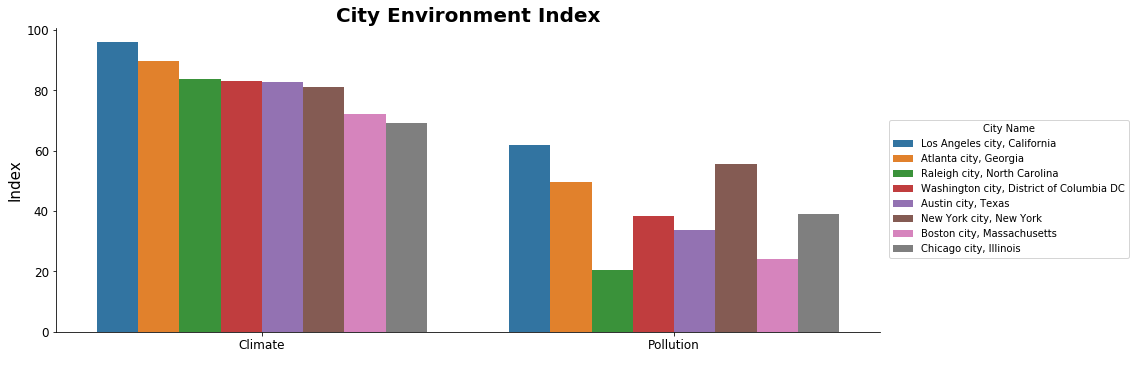

In [11]:
sns.factorplot(kind='bar',x='Type',y='Index',data=env_all,
               hue='City Name', size=5, aspect=2.5)

plt.title('City Environment Index', fontsize=20, fontweight='bold')

plt.xlabel(' ', fontsize=15)
plt.ylabel('Index', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Save_Figs/Environment_Index.png', bbox_inches='tight')

plt.show()

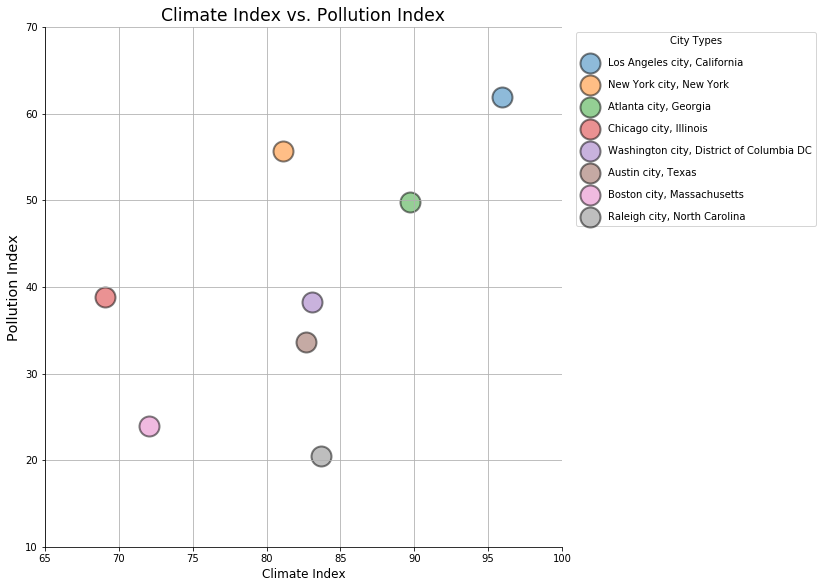

In [48]:
# Use seaborn to make the scatter plot
sns.lmplot(x='Climate Index', y='Pollution Index', data=env, fit_reg=False, hue='City Name', 
           legend=False, size=8, 
           scatter_kws={"s":400, 'alpha':0.5, 'edgecolors':'black', 'linewidths':2})
# Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(65,100)
plt.ylim(10,70)

# Make x-axis, y-axis & title labels
plt.title("Climate Index vs. Pollution Index", fontsize="xx-large")
plt.xlabel("Climate Index", fontsize="large")
plt.ylabel("Pollution Index", fontsize="x-large")

# Format the legend and plot
plt.legend(loc='upper right', title='City Types', bbox_to_anchor=(1.5,1), labelspacing=1.2)

plt.savefig('Save_Figs/Climate_vs_Pollution.png', bbox_inches='tight')
plt.show()